# Random Forest Model evaluation on Wellington data - Leandri Botha

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [8]:
df_Welly= pd.read_csv('Wellington.csv')
print(df_Welly)

     Unnamed: 0        date  Wellington    lagged
0             0  1992-01-31    123000.0       NaN
1             1  1992-02-29    122000.0  123000.0
2             2  1992-03-31    125000.0  122000.0
3             3  1992-04-30    129000.0  125000.0
4             4  1992-05-31    128000.0  129000.0
..          ...         ...         ...       ...
387         387  2024-04-30    820000.0  820000.0
388         388  2024-05-31    785000.0  820000.0
389         389  2024-06-30    793000.0  785000.0
390         390  2024-07-31    765000.0  793000.0
391         391  2024-08-31    790000.0  765000.0

[392 rows x 4 columns]


In [9]:
df_Welly['date'] = pd.to_datetime(df_Welly['date'], format='%Y-%m-%d', errors='coerce')
df_Welly.set_index('date', inplace = True)

In [10]:
df_Welly = df_Welly[['Wellington', 'lagged']]
df_Welly.head()

,Wellington,lagged
date,,
1992-01-31,123000.0,NaN
1992-02-29,122000.0,123000.0
1992-03-31,125000.0,122000.0
1992-04-30,129000.0,125000.0
1992-05-31,128000.0,129000.0


<Axes: xlabel='date'>

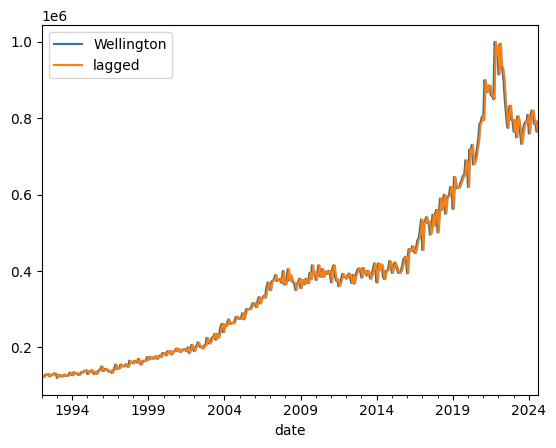

In [11]:
df_Welly.plot()


In [12]:
df_Welly

,Wellington,lagged
date,,
1992-01-31,123000.0,NaN
1992-02-29,122000.0,123000.0
1992-03-31,125000.0,122000.0
1992-04-30,129000.0,125000.0
1992-05-31,128000.0,129000.0
...,...,...
2024-04-30,820000.0,820000.0
2024-05-31,785000.0,820000.0
2024-06-30,793000.0,785000.0


In [13]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [14]:
df_expenses = pd.read_excel('House expense.xlsx')
df_expenses

,Unnamed: 0,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
0,NaN,A. Household net financial wealth (A1-A2),A1. Household financial assets,A2. Household financial liabilities,B. Household net wealth (B1+B2),B1. Household net financial wealth,B2. Housing and land value,C. Net equity in housing (C1-C2),C1. Housing and land value,C2. Housing loans,...,Household financial liabilities (including ren...,Household financial liabilities (including ren...,D. Total interest payments (D1+D2),D1. Interest payments on housing loans (in...,D2. Interest payments on consumer loans,D3. Total interest payments as a percentag...,E. Total interest payments (E1+E2),E1. Interest payments on housing loans (in...,E2. Interest payments on consumer loans,E3. Total interest payments as a percentag...
1,Notes,NaN,NaN,NaN,Yes,NaN,Yes,Yes,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,...,NZDm,%,NZDm,NZDm,NZDm,%,NZDm,NZDm,NZDm,%
3,Series Id,HHAL.QC5,HHAL.QA,HHAL.QB,HHAL.QC3,HHAL.QC5,HHAL.QC6,HHAL.QC2,HHAL.QC6,HHAL.QB11,...,HHAL.QM21,HHAL.QM23,HHAL.QD2.ZZH,HHAL.QD2.ZZH1,HHAL.QD2.ZZH2,HHAL.QR7.ZZH,HHAL.QD2.ZZHrt12,HHAL.QD2.ZZH1rt12,HHAL.QD2.ZZH2rt12,HHAL.QR7.ZZHrt12
4,1998-12-31 00:00:00,258766,307995,49229,435170,258766,176404,136555,176404,39849,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020-06-30 00:00:00,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
91,2020-09-30 00:00:00,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
92,2020-12-31 00:00:00,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
93,2021-03-31 00:00:00,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [15]:
df_expenses = df_expenses.drop(index=[0, 1, 2, 3], axis=1)
df_expenses

,Unnamed: 0,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
4,1998-12-31 00:00:00,258766,307995,49229,435170,258766,176404,136555,176404,39849,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
5,1999-03-31 00:00:00,265778,316060,50282,443779,265778,178000,137048,178000,40953,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
6,1999-06-30 00:00:00,271003,322900,51896,451398,271003,180395,138383,180395,42012,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
7,1999-09-30 00:00:00,276606,329750,53143,457799,276606,181193,138003,181193,43190,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
8,1999-12-31 00:00:00,282895,337334,54439,464088,282895,181193,137115,181193,44078,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020-06-30 00:00:00,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
91,2020-09-30 00:00:00,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
92,2020-12-31 00:00:00,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
93,2021-03-31 00:00:00,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [16]:
df_expenses.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [17]:
df_expenses.set_index('date', inplace = True)
df_expenses

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,Household disposable income,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,258766,307995,49229,435170,258766,176404,136555,176404,39849,16867,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
1999-03-31,265778,316060,50282,443779,265778,178000,137048,178000,40953,17162,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
1999-06-30,271003,322900,51896,451398,271003,180395,138383,180395,42012,17764,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
1999-09-30,276606,329750,53143,457799,276606,181193,138003,181193,43190,17997,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
1999-12-31,282895,337334,54439,464088,282895,181193,137115,181193,44078,18143,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,49073,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
2020-09-30,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,50467,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
2020-12-31,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,51247,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2


In [18]:
df_expenses.reset_index(drop = True)

,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,Household disposable income,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
0,258766,307995,49229,435170,258766,176404,136555,176404,39849,16867,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
1,265778,316060,50282,443779,265778,178000,137048,178000,40953,17162,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
2,271003,322900,51896,451398,271003,180395,138383,180395,42012,17764,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
3,276606,329750,53143,457799,276606,181193,138003,181193,43190,17997,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
4,282895,337334,54439,464088,282895,181193,137115,181193,44078,18143,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,49073,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
87,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,50467,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
88,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,51247,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
89,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,52570,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [19]:
df_expenses.isna()


,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,Household disposable income,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1999-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1999-06-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1999-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1999-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
welly_expenses = df_Welly.merge(df_expenses, on= 'date', how = 'inner' )

In [21]:
welly_expenses.dropna().head(5)

,Wellington,lagged,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,179000.0,185000.0,287245,342476,55231,469165,287245,181920,137066,181920,...,73533,102,1466,1191,275,8.1,5523,4477,1047,7.7
2001-03-31,190000.0,188000.0,291402,350838,59436,477998,291402,186596,139045,186596,...,78820,110,1684,1361,323,9.3,6566,5327,1239,9.2
2002-03-31,204500.0,200000.0,299288,363901,64613,500170,299288,200881,149610,200881,...,85524,113,1584,1254,329,8.3,6492,5179,1313,8.6
2003-03-31,225500.0,215000.0,308597,381078,72481,542511,308597,233914,177111,233914,...,95686,124,1855,1479,376,9.4,7111,5660,1452,9.2
2004-03-31,262000.0,255000.0,359757,443392,83635,662432,359757,302675,236235,302675,...,110845,131,2035,1631,404,9.4,7722,6157,1565,9.2


In [22]:
welly_expenses.head()

,Wellington,lagged,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,175000.0,165000.0,258766,307995,49229,435170,258766,176404,136555,176404,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
1999-03-31,170000.0,175000.0,265778,316060,50282,443779,265778,178000,137048,178000,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
1999-06-30,175000.0,170000.0,271003,322900,51896,451398,271003,180395,138383,180395,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
1999-09-30,175000.0,170000.0,276606,329750,53143,457799,276606,181193,138003,181193,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
1999-12-31,185000.0,175000.0,282895,337334,54439,464088,282895,181193,137115,181193,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6


# EDA

In [23]:
train, test = train_test_split(df_Welly, test_size = 0.2, shuffle = True)

In [24]:
train

,Wellington,lagged
date,,
2017-10-31,518500.0,547500.0
1992-08-31,128000.0,124000.0
2005-06-30,300000.0,283500.0
1994-05-31,130000.0,133000.0
2017-03-31,530000.0,527500.0
...,...,...
2013-05-31,388000.0,400000.0
2006-04-30,332000.0,320000.0
2010-02-28,390000.0,376500.0


In [25]:
test

,Wellington,lagged
date,,
2012-09-30,396000.0,386000.0
1994-08-31,135000.0,130000.0
2023-11-30,789000.0,790000.0
2013-03-31,395000.0,408000.0
2006-09-30,330000.0,335000.0
...,...,...
1997-04-30,150000.0,155000.0
2017-07-31,495000.0,530000.0
1994-06-30,127500.0,130000.0


In [26]:
random_param_grid = {
    'n_estimators': 200,
    'max_depth':  10,
    'max_samples': 0.8
    
}

In [27]:
rf_model = RandomForestRegressor(**random_param_grid)

In [28]:
rf_model.fit(train[['lagged']], train[['Wellington']])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_samples=0.8, n_estimators=200)

In [29]:
rf_pred = rf_model.predict(train[['lagged']])

In [30]:
mae = mean_absolute_error(rf_pred, train.Wellington)
print(mae)


8999.6977466144


In [31]:
mse = mean_squared_error(rf_pred, train.Wellington)
print(mse)

189538639.25188947


In [32]:
rmse = r2_score(rf_pred, train.Wellington)
print(rmse)

0.9959232057160926


In [33]:
train.index

DatetimeIndex(['2017-10-31', '1992-08-31', '2005-06-30', '1994-05-31',
               '2017-03-31', '2021-01-31', '2014-03-31', '1997-08-31',
               '2013-12-31', '2009-11-30',
               ...
               '2018-05-31', '1992-02-29', '2014-01-31', '2003-12-31',
               '2015-08-31', '2013-05-31', '2006-04-30', '2010-02-28',
               '2013-01-31', '2003-01-31'],
              dtype='datetime64[ns]', name='date', length=313, freq=None)

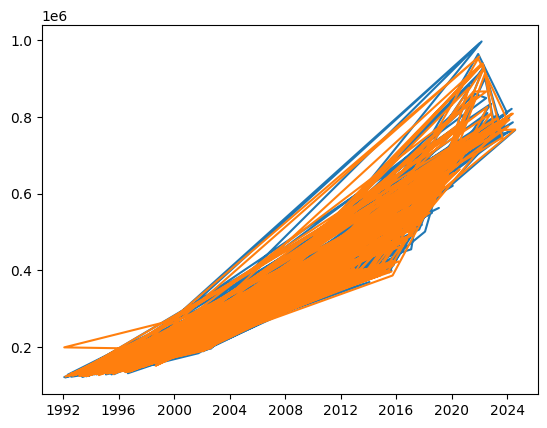

In [34]:
from matplotlib import pyplot as plt

plt.plot(train.index, train.Wellington)
plt.plot(train.index, rf_pred)

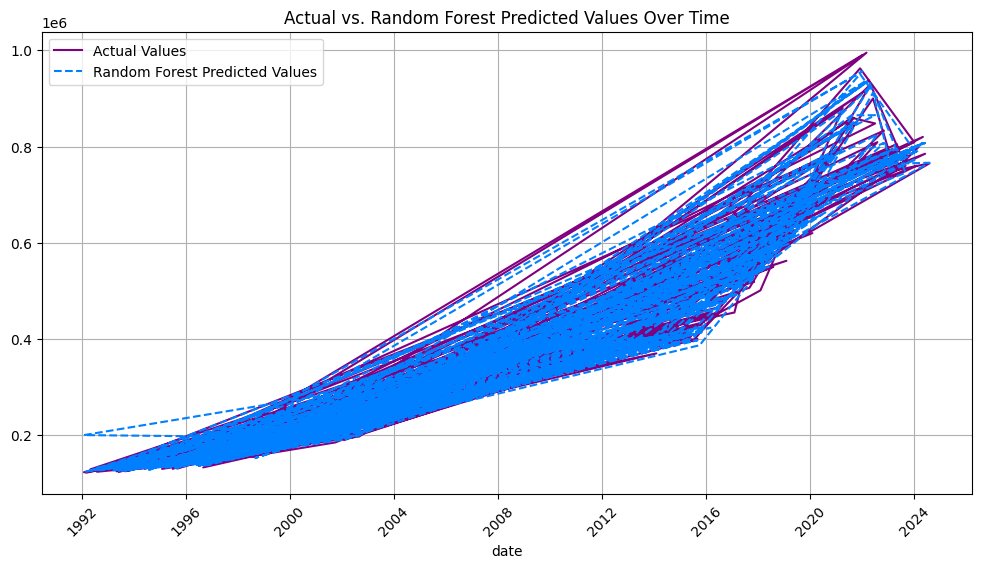

In [35]:
from matplotlib import pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(train.index, train.Wellington ,label='Actual Values', linestyle='-', color = 'purple')
plt.plot(train.index, rf_pred, label='Random Forest Predicted Values', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [36]:
test_pred = rf_model.predict(test[['lagged']])

In [37]:
mae_test = mean_absolute_error(test_pred, test.Wellington)
print(mae_test)

16045.870553319228


In [38]:
mse_test = mean_squared_error(test_pred, test.Wellington)
print(mse_test)

925391339.2483076


In [39]:
rmse_test = r2_score(test_pred, test.Wellington)
print(rmse_test)

0.9838064942791919


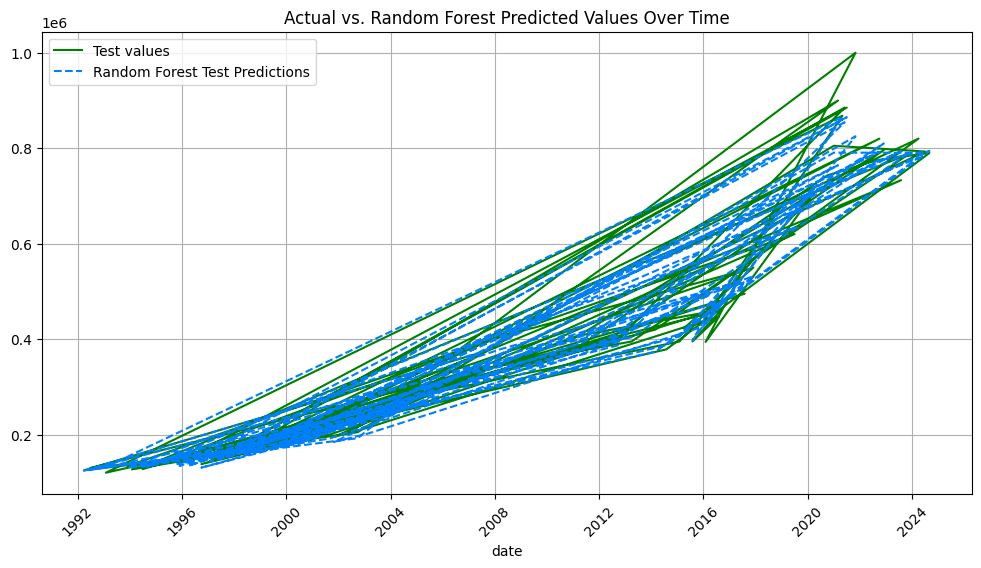

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.Wellington ,label='Test values', linestyle='-', color = 'green')
plt.plot(test.index, test_pred, label='Random Forest Test Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [41]:
train = df_Welly[:-30].dropna()

In [42]:
test = df_Welly[-30:].dropna()

In [43]:
rf_model.fit(train[['lagged']], train[['Wellington']])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_samples=0.8, n_estimators=200)

In [44]:
pred = rf_model.predict(train[['lagged']])

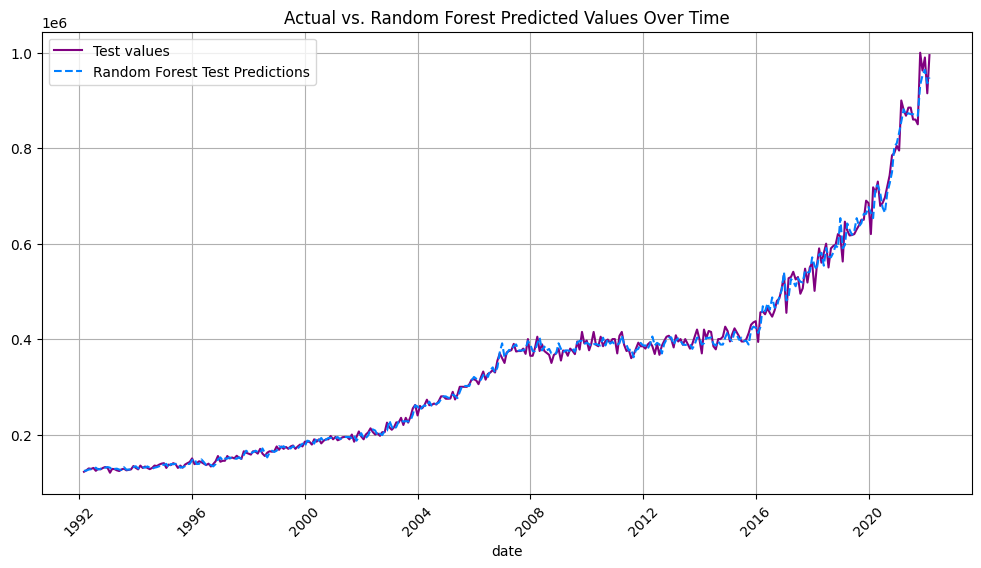

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.Wellington ,label='Test values', linestyle='-', color = 'purple')
plt.plot(train.index, pred, label='Random Forest Test Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [46]:
mae = mean_absolute_error(pred, train.Wellington)
print(mae)
mse = mean_squared_error(pred, train.Wellington)
print(mse)
rmse = r2_score(pred, train.Wellington)
print(rmse)

8935.352557783299
178686561.21662366
0.9951772314880837


In [47]:
test_pred = rf_model.predict(test[['lagged']])

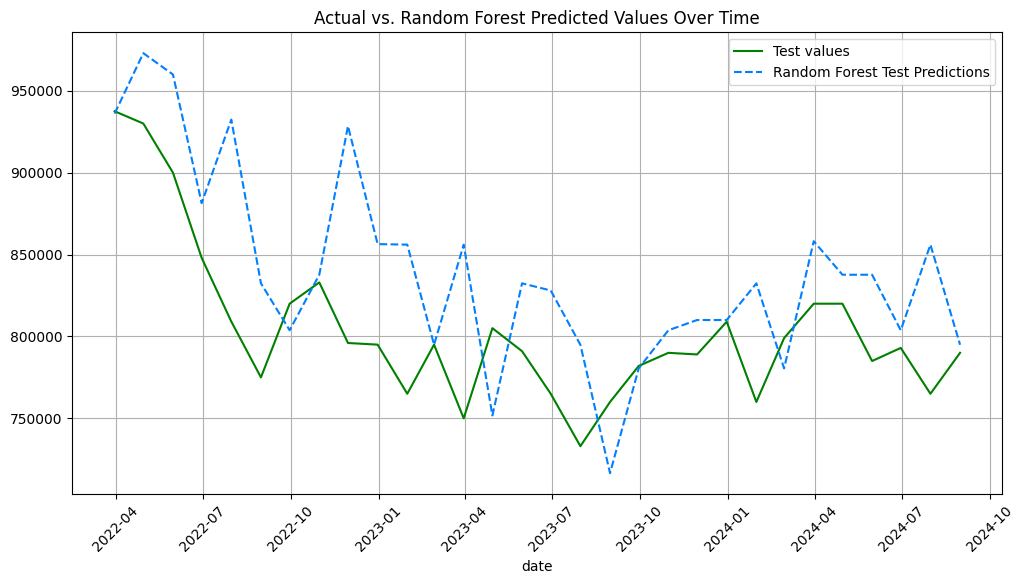

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.Wellington ,label='Test values', linestyle='-', color = 'green')
plt.plot(test.index, test_pred, label='Random Forest Test Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [49]:
mae_test = mean_absolute_error(test_pred, test.Wellington)
print(mae_test)
mse_test = mean_squared_error(test_pred, test.Wellington)
print(mse_test)
rmse_test = r2_score(test_pred, test.Wellington)
print(rmse_test)

44570.0783333333
3321695211.739123
0.03253093682610331


In [50]:
random_param_grid2 = {
    'n_estimators': (100, 200, 500),
    'max_depth':  (5, 10, 20),
    'min_samples_split': (2, 5, 10),
    'min_samples_leaf': (1, 2, 5, 10),
    'max_leaf_nodes': (10, 20, 50)
    
}

In [51]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(estimator = rf_model, param_distributions = random_param_grid2, n_iter = 200, cv = 5, random_state = 42, n_jobs = -1)

In [52]:
rf_search = random_search.fit(train[['lagged']], train['Wellington'].values)
rf_search.best_params_

/home/codespace/.python/current/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 50,
 'max_depth': 20}

In [53]:
test_search_pred = rf_search.best_estimator_.predict(test[['lagged']])

In [54]:
mae_search = mean_absolute_error(test_search_pred, test.Wellington)
print(mae_search)
mse_search = mean_squared_error(test_search_pred, test.Wellington)
print(mse_search)
rmse_search = r2_score(test_search_pred, test.Wellington)
print(rmse_search)

41208.41704901404
2560212166.515158
-0.04105732816123475


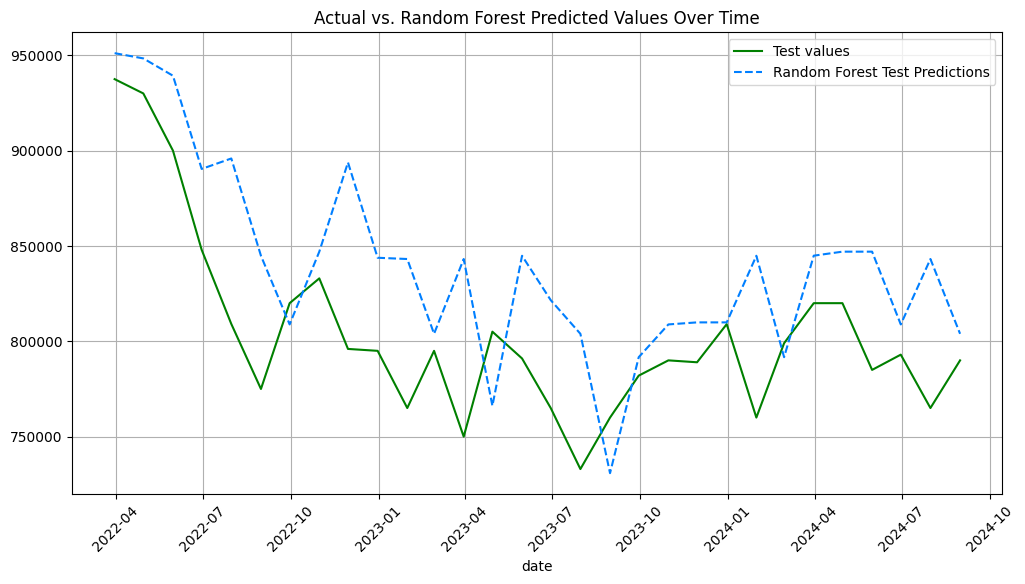

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.Wellington ,label='Test values', linestyle='-', color = 'green')
plt.plot(test.index, test_search_pred, label='Random Forest Test Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Wellington expenses EDA

In [95]:
welly_expenses = welly_expenses.apply(pd.to_numeric, errors='coerce')

In [96]:
random_params = {
    'n_estimators': 200,
    'max_depth':  5,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_leaf_nodes': 10,
    'random_state': 42
    
}

In [97]:
rf_model2 = RandomForestRegressor(**random_params)

In [98]:
train, test = train_test_split(welly_expenses, test_size=0.2, shuffle=False)

In [99]:
rf_model2.fit(train.drop(columns = ['Wellington']), train.Wellington)

RandomForestRegressor(max_depth=5, max_leaf_nodes=10, min_samples_leaf=2,
                      n_estimators=200, random_state=42)

In [100]:
welly_pred = rf_model2.predict(train.drop(columns = ['Wellington']))

In [101]:
mae2 = mean_absolute_error(welly_pred, train.Wellington)
print(mae2)
mse2 = mean_squared_error(welly_pred, train.Wellington)
print(mse2)
rmse2 = r2_score(welly_pred, train.Wellington)
print(rmse2)

4443.713136002314
39400128.841074824
0.9951824677167682


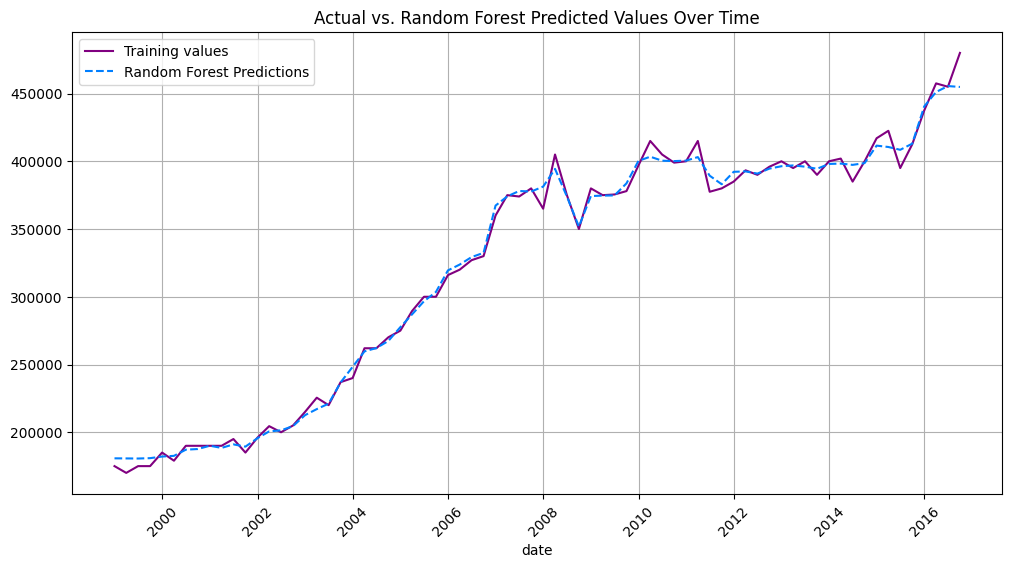

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.Wellington ,label='Training values', linestyle='-', color = 'purple')
plt.plot(train.index, welly_pred, label='Random Forest Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [103]:
welly_test_pred = rf_model2.predict(test.drop(columns = ['Wellington']))

In [104]:
mae_test2 = mean_absolute_error(welly_test_pred, test.Wellington)
print(mae_test2)
mse_test2 = mean_squared_error(welly_test_pred, test.Wellington)
print(mse_test2)
rmse_test2 = r2_score(welly_test_pred, test.Wellington)
print(rmse_test2)

198544.16005497248
51642745261.40859
-1546.4139315025147


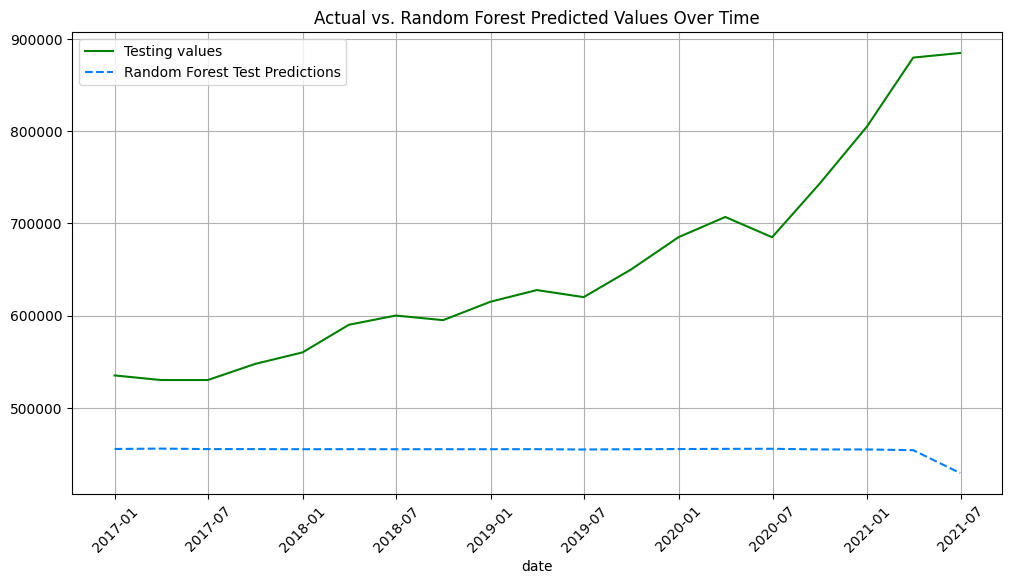

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.Wellington ,label='Testing values', linestyle='-', color = 'green')
plt.plot(test.index, welly_test_pred, label='Random Forest Test Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [106]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [107]:
import shap

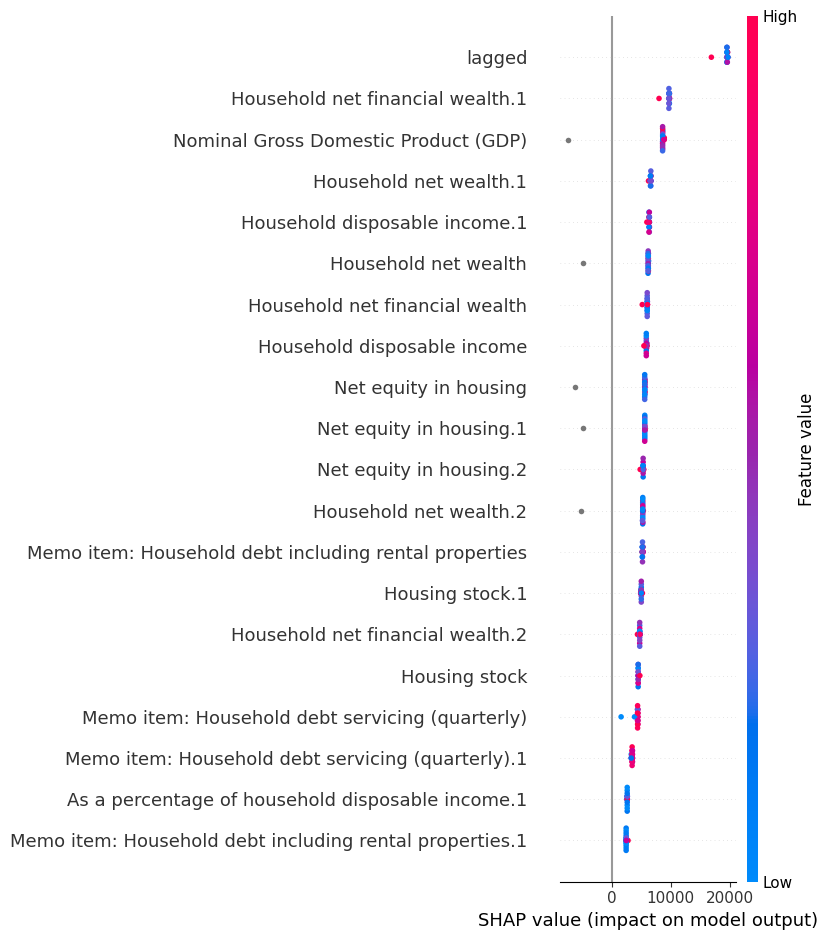

In [108]:
explainer = shap.Explainer(rf_model2, train.drop(columns = ['Wellington']))
shap_values = explainer.shap_values(test.drop(columns = ['Wellington']))
shap.summary_plot(shap_values, test.drop(columns = ['Wellington']))

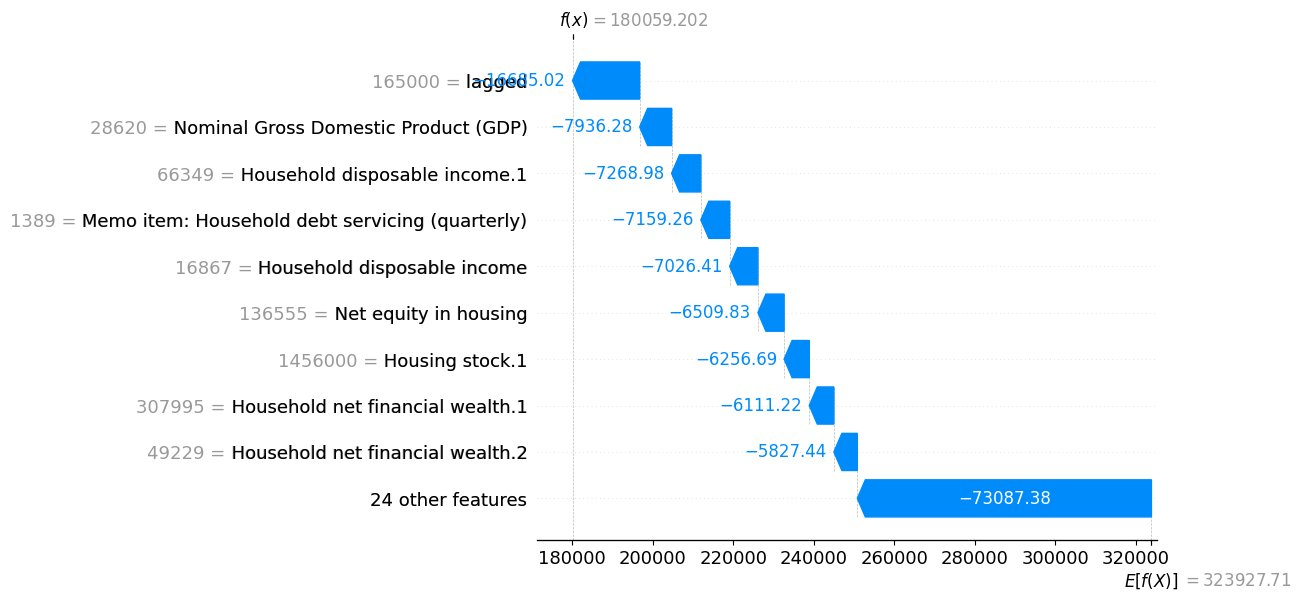

In [142]:
shap_values = explainer(welly_expenses.drop(columns='Wellington'))
shap.waterfall_plot(shap_values[0])

In [127]:
shap_head = [ 
    "Household net financial wealth.1",
    "Nominal Gross Domestic Product (GDP)",
    "Household net wealth.1",
    "Household disposable income.1",
    "Household net wealth",
    "Household net financial wealth",
    "Household disposable income",
    "Net equity in housing",
    "Net equity in housing.1",
    "Net equity in housing.2",
    "Household net wealth.2",
    "Memo item: Household debt including rental properties",
    "Housing stock.1",
    "Household net financial wealth.2",
    "Housing stock",
    "Memo item: Household debt servicing (quarterly)",
    "Memo item: Household debt servicing (quarterly).1",
    "As a percentage of household disposable income.1",
    "Memo item: Household debt including rental properties.1",
    "lagged",
    "Wellington"

]

In [128]:
random_params = {
    'n_estimators': 200,
    'max_depth':  5,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_leaf_nodes': 10,
    'random_state': 42
    
}

In [129]:
rf_model2 = RandomForestRegressor(**random_params)

In [130]:
train, test = train_test_split(welly_expenses[shap_head], test_size=0.2, shuffle=False)

In [131]:
rf_model2.fit(train.drop(columns = ['Wellington']), train.Wellington)

RandomForestRegressor(max_depth=5, max_leaf_nodes=10, min_samples_leaf=2,
                      n_estimators=200, random_state=42)

In [132]:
welly_pred = rf_model2.predict(train.drop(columns = ['Wellington']))

In [133]:
mae2 = mean_absolute_error(welly_pred, train.Wellington)
print(mae2)
mse2 = mean_squared_error(welly_pred, train.Wellington)
print(mse2)
rmse2 = r2_score(welly_pred, train.Wellington)
print(rmse2)

4564.00158416468
39964153.25037649
0.9951196642611536


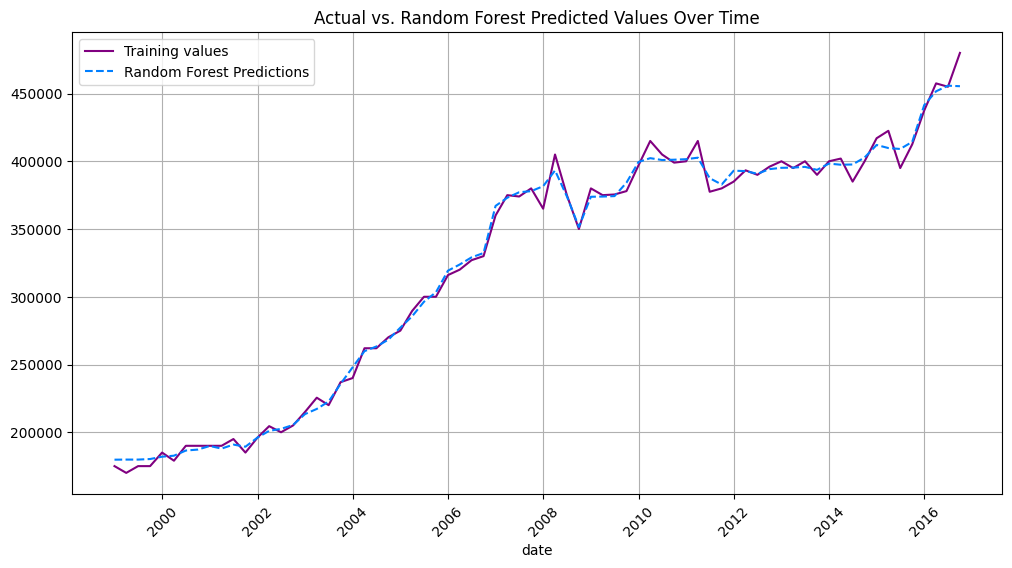

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.Wellington ,label='Training values', linestyle='-', color = 'purple')
plt.plot(train.index, welly_pred, label='Random Forest Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [135]:
welly_test_pred = rf_model2.predict(test.drop(columns = ['Wellington']))

In [136]:
mae_test2 = mean_absolute_error(welly_test_pred, test.Wellington)
print(mae_test2)
mse_test2 = mean_squared_error(welly_test_pred, test.Wellington)
print(mse_test2)
rmse_test2 = r2_score(welly_test_pred, test.Wellington)
print(rmse_test2)

198298.2455062286
51504508388.07782
-1722.405919553531


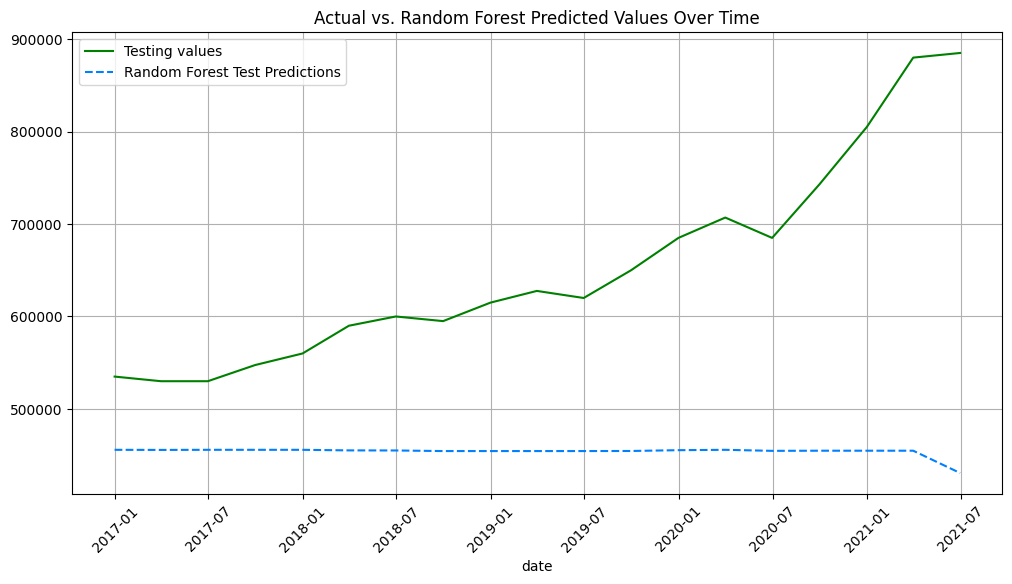

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.Wellington ,label='Testing values', linestyle='-', color = 'green')
plt.plot(test.index, welly_test_pred, label='Random Forest Test Predictions', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Feature engineering